# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


>This report was generated from a dataset collection from The Movie Database (TMDb). This is a very thorough dataset of movies release between the years of 1960 and 2015. There are over 10,000 rows of data with characteristics of the film (tagline, genre, etc), financial inforamtion, popularity, and when the film was release.  


### Questions for Analysis

> Have movies been getting longer year over year?

> What year had the most popular releases?

> Does the vote averages reflect similar results as popuarity?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling Step 1: Gather Data

>First, I used pandas to load the dataset.

In [3]:
df_movies = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

## Data Wrangling Step 2: Assess Data

> Second, I used several function to get a general understanding of the dataset. I found that there are 10,866 rows and 21 column of data. There is a mixture of numeric and string datatypes and several cells using an object data type had multiple point of thata that were separated by a bar ( | ). On initial glance it looked as if the majority of the omitted data was confined to the object datatype, but after review the statistical inforamtion it appears that missing numerical data simply had a "0" as a placeholder. 

In [4]:
df_movies.shape

(10866, 21)

In [5]:
df_movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



## Data Wrangling Step 3: Cleaning Data

> Cleaning the data for this dataset required careful consideration. I started with the easy task of removing the 1 duplicated row, as well as many of the columns that I wouldn't be using. Then explored the main columns that I wanted to explore, release year, runtime, popularity and vote average. I wanted to find where any potential outliers were, as well as if they had a placeholder to hide missing data. 

In [8]:
sum(df_movies.duplicated())

1

In [9]:
df_movies.drop_duplicates(inplace=True)

In [10]:
sum(df_movies.duplicated())

0

In [11]:
df_movies.drop(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df_movies.head(10)

,id,popularity,runtime,release_date,vote_count,vote_average,release_year
0,135397,32.985763,124,6/9/15,5562,6.5,2015
1,76341,28.419936,120,5/13/15,6185,7.1,2015
2,262500,13.112507,119,3/18/15,2480,6.3,2015
3,140607,11.173104,136,12/15/15,5292,7.5,2015
4,168259,9.335014,137,4/1/15,2947,7.3,2015
5,281957,9.110700,156,12/25/15,3929,7.2,2015
6,87101,8.654359,125,6/23/15,2598,5.8,2015
7,286217,7.667400,141,9/30/15,4572,7.6,2015
8,211672,7.404165,91,6/17/15,2893,6.5,2015
9,150540,6.326804,94,6/9/15,3935,8.0,2015


> I started with reviewing the release year and found the range to be between 1965 and 2015. 

In [12]:
df_movies['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

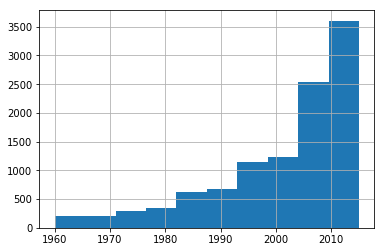

In [13]:
df_movies['release_year'].hist();

>This release year histogram tells me that the number of movies made year over year has been increasing year over year with an exponential increase in the mid 2000's

> Exploring the popularity column presented me with quite a challenge. It was clear by looking at the distribution and the statistical inforamtion that there are big outliers that significantly skew the data to the right. After assessing the quartiles of the data, I came to the conclusion that anything greater that a popularity of 1 is a possible outlier. 

> With the popularity data now in decimals, I attemped to make the analysis easier to read by multiplying the values by 100, and rounding to the nearest whole number. 

>I verified my assumptions about my assumptions about any possible outliers by creating another histgram with the updates and then saved it as a new dataframe. 

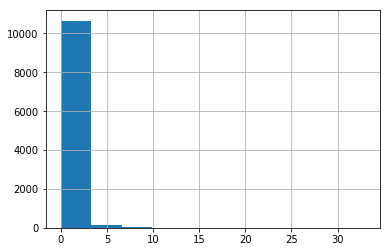

In [14]:
df_movies['popularity'].hist();

In [15]:
df_movies['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

In [16]:
pop_possible_outliers = df_movies[(df_movies['popularity'] >= 1) | (df_movies['popularity'] <= 0.01)]
pop_possible_outliers['popularity'].count()

1854

In [17]:
df_movies['pop_round_100'] = df_movies['popularity'].values
df_movies['pop_round_100'] = np.trunc(df_movies['pop_round_100'] * 100)
df_movies.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,pop_round_100
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,64.146618
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,100.022164
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,20.000000
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,38.000000
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,71.000000
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,3298.000000


In [18]:
df_pop = df_movies[(df_movies['pop_round_100'] < 100) & (df_movies['pop_round_100'] >= 1)]
df_pop.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,pop_round_100
count,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000
mean,67153.272889,0.369880,100.308512,71.060260,5.891544,2000.788481,36.489291
std,92757.981771,0.235482,30.718330,148.513246,0.939037,13.101088,23.549588
min,6.000000,0.010016,0.000000,10.000000,1.500000,1960.000000,1.000000
25%,11363.500000,0.187407,90.000000,15.000000,5.300000,1994.000000,18.000000
50%,21948.000000,0.322496,97.000000,29.000000,5.900000,2005.000000,32.000000
75%,74751.500000,0.513636,109.000000,72.000000,6.500000,2011.000000,51.000000
max,414419.000000,0.999866,877.000000,4368.000000,8.900000,2015.000000,99.000000


> Cleaning the vote average column included verifying there was no outliers and missing data.

In [19]:
df_pop['vote_average'].describe()

count    9011.000000
mean        5.891544
std         0.939037
min         1.500000
25%         5.300000
50%         5.900000
75%         6.500000
max         8.900000
Name: vote_average, dtype: float64

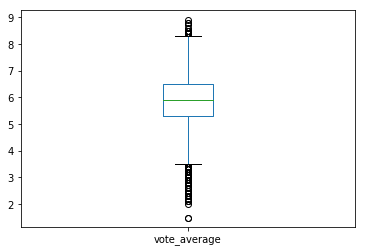

In [20]:
df_pop['vote_average'].plot(kind='box');

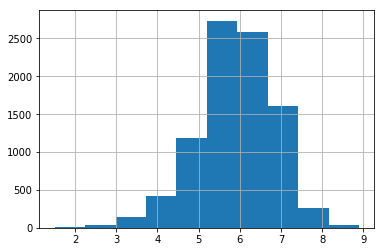

In [21]:
df_pop['vote_average'].hist();

> The final cleaning was for the 'runtime' column. I research film lengths I found that the Academy of Motion Picture Arts and Science defines a feature film length is over 40 minutes. Once I removed the lower limit from the dataset, I used three times the standard devation plus the mean to calulate the upper limit of the data. 

>This put the film runtime between 40 and 191 minutes. 

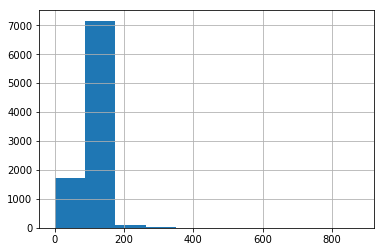

In [22]:
df_pop['runtime'].hist();

In [23]:
df_pop['runtime'].describe()

count    9011.000000
mean      100.308512
std        30.718330
min         0.000000
25%        90.000000
50%        97.000000
75%       109.000000
max       877.000000
Name: runtime, dtype: float64

In [24]:
df_feature = df_pop[df_pop['runtime'] > 40]
df_feature['runtime'].describe()

count    8779.000000
mean      102.646429
std        27.451472
min        41.000000
25%        90.000000
50%        98.000000
75%       110.000000
max       877.000000
Name: runtime, dtype: float64

In [25]:
df_feature = df_feature[df_feature['runtime'] <= 191]
df_feature.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,pop_round_100
count,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000
mean,65505.695417,0.372821,101.089009,71.991501,5.863225,2000.660503,36.784311
std,91623.068017,0.235435,18.214575,150.614390,0.928717,13.116560,23.544106
min,6.000000,0.010016,41.000000,10.000000,1.500000,1960.000000,1.000000
25%,11241.500000,0.190222,90.000000,15.000000,5.300000,1993.000000,19.000000
50%,21183.000000,0.324081,98.000000,29.000000,5.900000,2005.000000,32.000000
75%,71231.000000,0.516744,109.000000,73.000000,6.500000,2011.000000,51.000000
max,409696.000000,0.999866,191.000000,4368.000000,8.900000,2015.000000,99.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Have movies been getting longer? 

>I wanted to be able to plot the average runtime per year by years. However 55 years was a lot of points on the plot, so I decided to put the 55 years into 5 year ranges. After that I created a function to calculate the average (in this case runtime) per year ranges. 

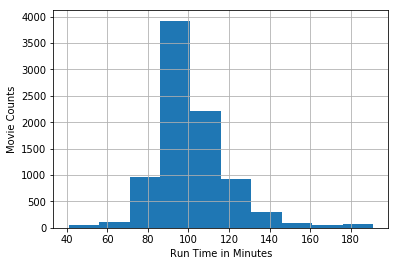

In [26]:
runtime_hist=df_feature['runtime'].hist()
runtime_hist.set_ylabel('Movie Counts')
runtime_hist.set_xlabel('Run Time in Minutes');

>The distribution of the runtimes is slightly skewed to the right and we can see the the vast majority of movies run for about 85 to 100 minutes.

In [27]:
df_feature['release_year'].min()

1960

In [28]:
year_bins = [1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2016]
year_range = ['1960-64', '1965-69', '1970-74', '1975-79', '1980-84', '1985-89', '1990-94', '1995-99', '2000-04', '2005-09', '2010-15']

df_feature['yearRange'] = pd.cut(df_feature['release_year'], bins=year_bins, labels=year_range, include_lowest=True)

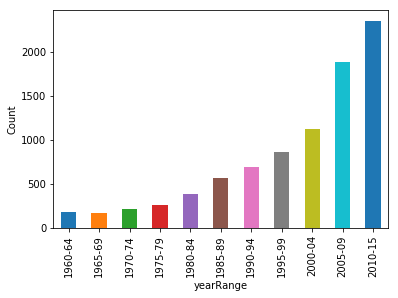

In [29]:
df_feature.groupby('yearRange')['id'].count().plot(kind='bar').set_ylabel('Count');

>This chart tells me that the amount of movies made since the last 1960's has been increasing and there was an exponential increase between the early and late 2000's.

In [30]:
"""This function calculates the average variable per year range."""
def avg_per_year(x):
   return df_feature.groupby(df_feature.yearRange)[x].mean()

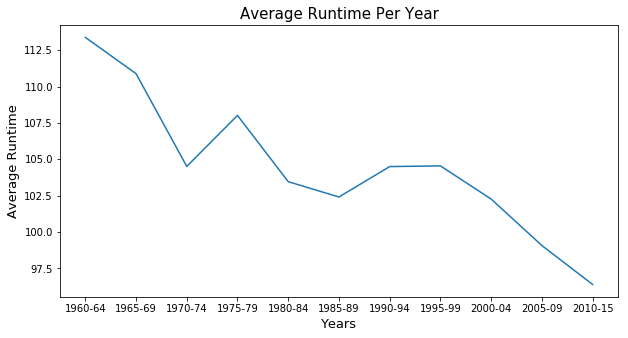

In [31]:
plt.figure(figsize=(10,5))
plt.xlabel('Years', fontsize=13)
plt.ylabel('Average Runtime', fontsize=13)
plt.title('Average Runtime Per Year', fontsize=15)

plt.plot(year_range, avg_per_year(['runtime']));


> The lineplot shows that despite my initial assumption that movies have been getting longer year over year, it is actually the opposite. The average runtime per movie in early 1960's was about 113 minutes, and by the early 2010's the runtime was 17 minutes less at about 96 minutes. 

### Research Question 2 : What year had the most popular releases?

> For my next question, I wanted to explore whether or not one year in particular had more popular movies than the others. I created boxplots so I could view all of the statistical information about the popularity by the year range. Next, I created a bar chart to show the average popularity per year range with a line referencing the overall average popularity.


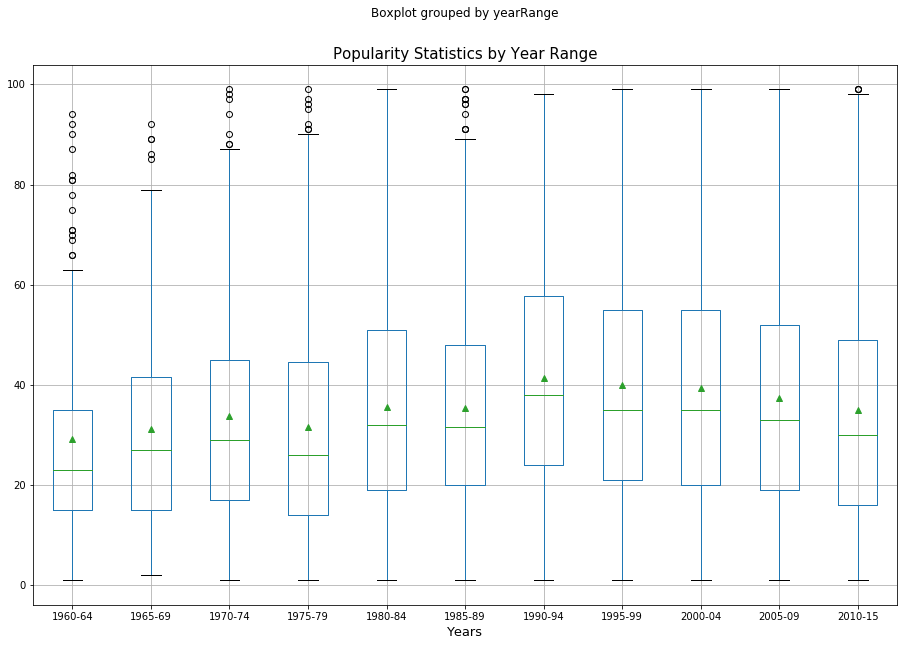

In [32]:
df_feature.boxplot(column=['pop_round_100'],by=['yearRange'],figsize=(15,10), showmeans=True)
plt.title('Popularity Statistics by Year Range', fontsize =15)
plt.xlabel('Years', fontsize=13);

> Viewing boxplots give a lot of helpful insites about the spread of popularity by year. We can see that the median throughout the years stays within about 10 points of eachother. We can also clearly see that the early 1990's has the most popular releases not only with the highest average, but it has the highest overall inner quartile range. 

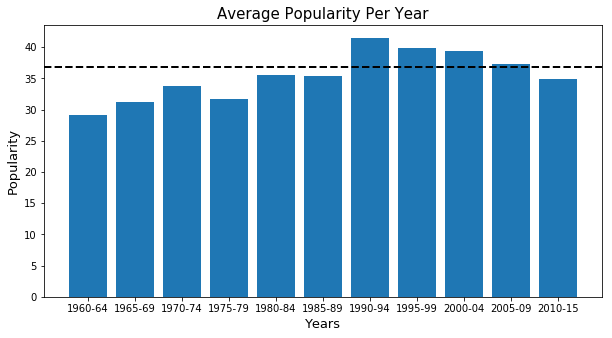

In [33]:
plt.figure(figsize=(10,5))
plt.xlabel('Years', fontsize=13)
plt.ylabel('Popularity', fontsize=13)
plt.title('Average Popularity Per Year', fontsize =15)
plt.axhline(y=(df_feature['pop_round_100'].mean()),linewidth=2, color='k', linestyle=('--'))
plt.bar(year_range, df_feature.groupby(df_feature.yearRange)['pop_round_100'].mean().values.reshape(len(df_feature.groupby(df_feature.yearRange))));


> While the barchart shows very similar infomration as the boxplots it is easier to read the most popular year range as 1990-1994. It is also interesting to see the overall popularities compared to the year ranges. 

### Research Question 3 : Does the vote averages reflect similar results as popuarity?
>In my final question I wanted to explore if the voting averages would be a good indicator of overall popularity. 


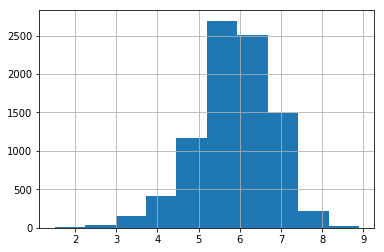

In [34]:
df_feature['vote_average'].hist();

> I stared by looking at the distribution, which told me that the vast majority of movies had an average vote between 5 and 7.

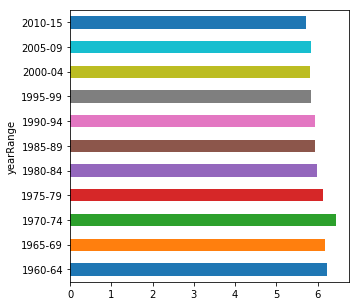

In [35]:
avg_per_year('vote_average').plot(kind='barh', figsize=(5,5));

> Next I looked at the data broken out by years. This was very interesting as it shows that 1970-1974 had the highest vote average, and the other years didn't have a lot of variation in their averages. 

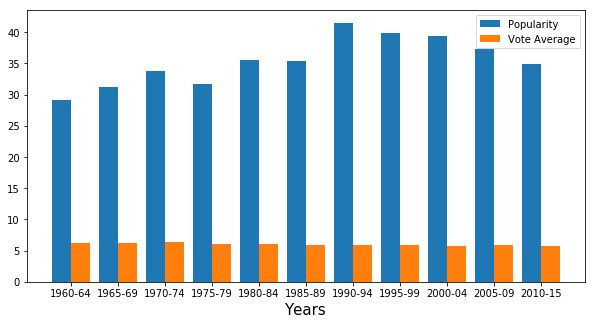

In [36]:
plt.figure(figsize=(10,5))


x_axis = np.arange(len(year_range))
bar1_width = x_axis - 0.2
bar2_width = x_axis + 0.2


y1_pop= avg_per_year('pop_round_100')
y2_votes=avg_per_year('vote_average')


plt.bar(bar1_width, y1_pop, 0.4, label='Popularity')
plt.bar(bar2_width, y2_votes, 0.4, label='Vote Average')

plt.xlabel('Years', fontsize=15)
plt.xticks(x_axis, year_range)

plt.legend();


>Finally, I plotted the two points together. This data shows that the vote average is not an indicator of the overall popularity.

<a id='conclusions'></a>
## Conclusions

> This data has lead to me to very interesting conclusions. As I was looking into the average runtimes per year my expectation was the opposite of what the data outlined. I assumed that movies overall were getting longer, but according to the data movies between 1960 and 2015 are atually getting shorter on average. 

> However, there are many considerations that prevent me from making this into a definitive statement. The data only has movies up until 2015, therefore we cannot make draw any concusion after that point. There are also outliers to consider. In my own data cleanup I used three times the standard devation plus the mean to remove outliers, but with a more thorough understanding of the dataset we could find that it was not the best way to handle those outliers. 

> The popularity graphs show that the 1990's had the most popular releases, and also that there isn't a huge variation on movie popularity in this dataset. With the overall average at 36.8, most of the years were within 5 points of the overall average. We also learned that the average votes does is not an indicator of overall popularity.

> I once again cannot make this into a definitive statement because of limitation in the dataset as well as the assumptions I made in handling the outliers. I couldn't find any information about how popularity was measured which is why I tried to a second data point (vote average) to potentially have a less subjective measurement. It also made it diffcult when working on the outliers. I assumed that since 83% of the popularity measurement was less than 1 and greater than 0.01 anthing outside of this range could be considered an outlier. 




In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0